In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lib.query import write_query, query_to_df
from lib.units import ra_decimal, dec_decimal

In [2]:
gc_list = pd.read_csv("gc_list.csv")
gc_list.head()

,Name,Con,RA,DEC,R_Sun,R_gc,m_v,dim,status
0,"NGC 104, 47 Tuc",Tuc,0:24:06,-72:04:53,14.7,24.1,3.95,50.0,confirmed
1,NGC 288,Scl,0:52:45,-26:34:57,29.0,39.1,8.09,13.0,confirmed
2,NGC 362,Tuc,1:03:14,-70:50:56,28.0,30.6,6.40,14.0,confirmed
3,Whiting 1,Cet,2:02:57,-3:15:10,98.1,112.5,15.03,1.2,confirmed
4,NGC 1261,Hor,3:12:16,-55:12:58,53.1,59.0,8.29,6.8,confirmed


In [3]:
sample_cluster = gc_list.loc[1]
sample_cluster

Name        NGC 288
Con             Scl
RA          0:52:45
DEC       -26:34:57
R_Sun          29.0
R_gc           39.1
m_v            8.09
dim            13.0
status    confirmed
Name: 1, dtype: object

In [11]:
query = write_query(
    ra_decimal(sample_cluster.RA),
    dec_decimal(sample_cluster.DEC),
    "CIRCLE", 5, limit=2000
)
print(query)
cluster_df = query_to_df(query)


    SELECT TOP 2000
    source_id, ra, dec, parallax, pmra, pmdec, phot_g_mean_mag, bp_rp, DISTANCE(POINT('ICRS', ra, dec), POINT('ICRS', 13.1875, -25.4175)) AS dist
    FROM gaiadr3.gaia_source
    WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', 13.1875, -25.4175, 5))=1
    AND parallax > 0
    AND pmra IS NOT NULL
    AND pmdec IS NOT NULL
    AND phot_g_mean_mag IS NOT NULL
    AND bp_rp IS NOT NULL
    ORDER BY dist ASC
    


In [12]:
cluster_df.head()

,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,dist
0,2345293795656501504,13.174980,-25.407417,0.137611,-0.544700,-8.419847,19.291046,0.888512,0.015151
1,2345293903031086848,13.187693,-25.391947,2.005921,7.066473,-10.773629,16.526520,1.752634,0.025554
2,2345287890076872960,13.155948,-25.428483,0.361368,-1.948640,-6.943517,16.779613,0.893938,0.030540
3,2345287679623048320,13.162679,-25.442066,0.739119,7.334837,-13.281918,18.072870,1.860229,0.033257
4,2345287645263310080,13.154248,-25.442321,0.055865,0.133031,-46.365329,19.304785,1.626202,0.038961


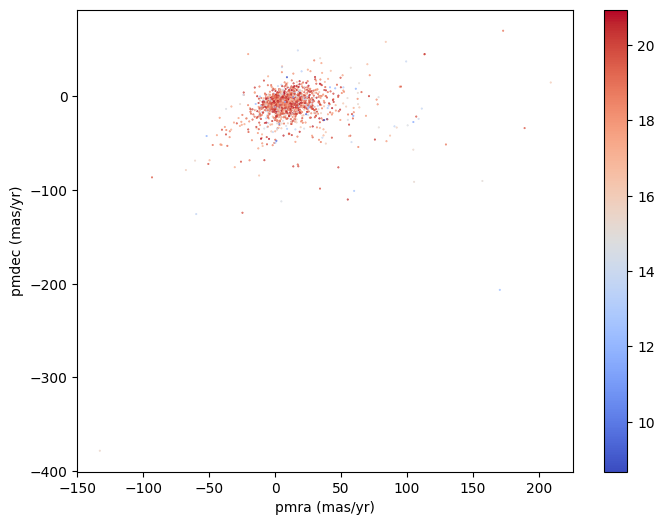

In [25]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    cluster_df.pmra, 
    cluster_df.pmdec, 
    s=0.2, 
    c=cluster_df.phot_g_mean_mag,
    cmap="coolwarm"
)
plt.colorbar()
plt.xlabel("pmra (mas/yr)")
plt.ylabel("pmdec (mas/yr)")
plt.show()


In [17]:
cluster_df.to_csv(f'data/sample_cluster.csv')